# Charger et inspecter Data.csv

## importation 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Charger et inspecter Data.csv

In [ ]:
absolute_path = "data.csv"
df_abs = pd.read_csv(absolute_path)
print(df_abs.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Étudier les valeurs manquantes et Corrélations

In [21]:
# Voir les valeurs manquantes
print("les valeurs manquantes sont : ", df_abs.isnull().sum().sum())

les valeurs manquantes sont :  0


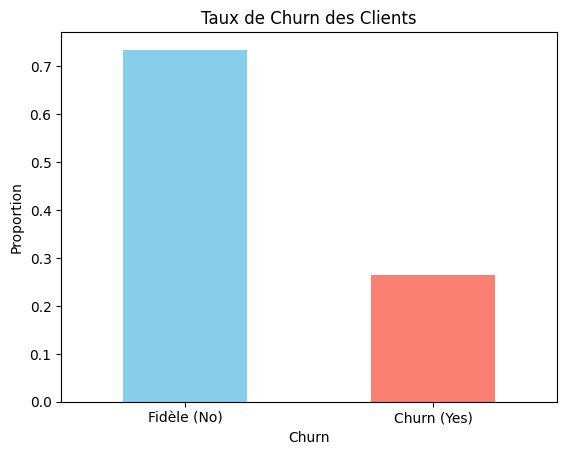

In [20]:
churn_rate = df_abs['Churn'].value_counts(normalize=True)
churn_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Taux de Churn des Clients')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['Fidèle (No)', 'Churn (Yes)'], rotation=0)
plt.show()

In [24]:
# Select columns with a specific data type (e.g., 'object' for strings/categories)
object_columns_df = df_abs.select_dtypes(include=['object']).columns
num_columns_df = df_abs.select_dtypes(include=['number']).columns

print("\nDataFrame with only 'object' (string/categorical) columns:")
print(object_columns_df)
print("\nDataFrame with only 'number' (numeric) columns:")
print(num_columns_df)


DataFrame with only 'object' (string/categorical) columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

DataFrame with only 'number' (numeric) columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [27]:
corelation = df_abs[num_columns_df].corr()
print(corelation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


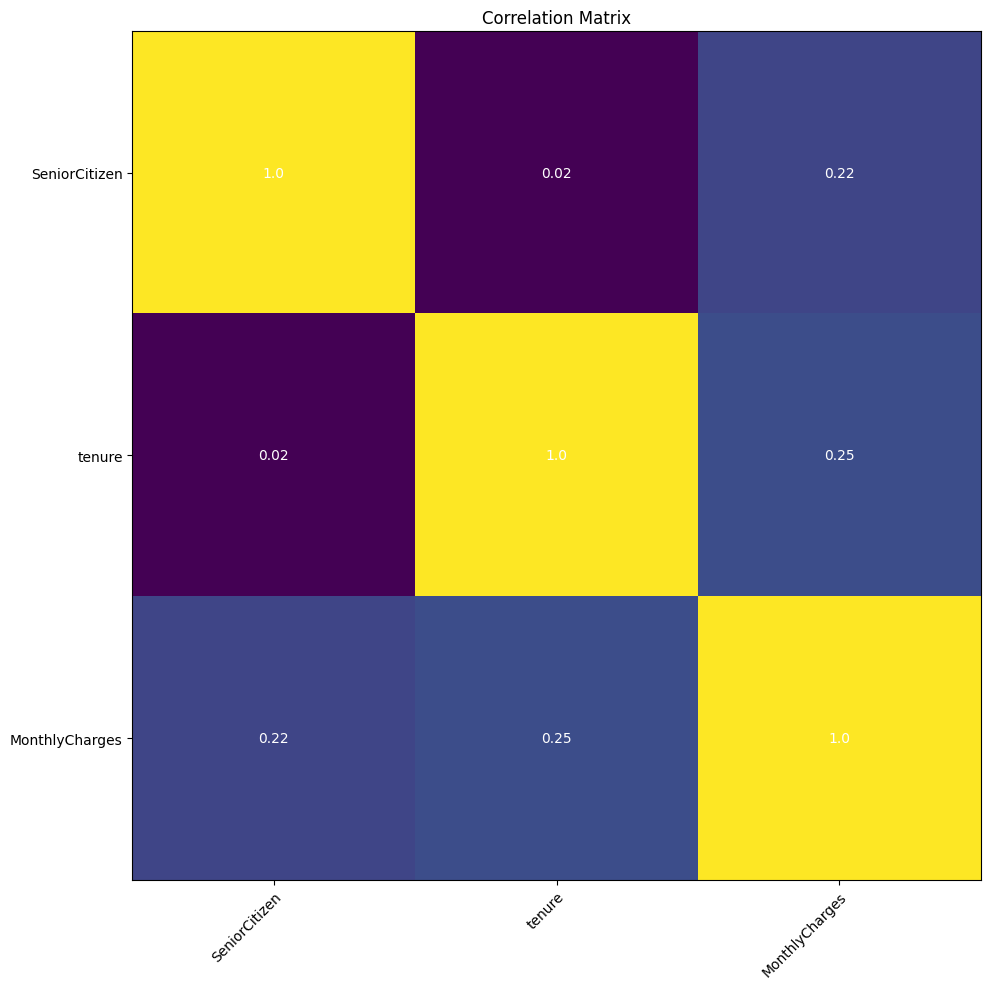

In [ ]:
    fig, ax = plt.subplots(figsize=(12,10))
    im = ax.imshow(corelation)
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(range(len(corelation.columns)), labels=corelation.columns,
                rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(corelation.index)), labels=corelation.index)

    # Loop over data dimensions and create text annotations.
    for i in range(len(corelation.columns)):
        for j in range(len(corelation.index)):
            text = ax.text (j, i, round(corelation.iloc[i, j], 2),
                        ha="center", va="center", color="w")

    ax.set_title("Correlation Matrix")
    fig.tight_layout()
    plt.show()